In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [2]:
alldata, label_true = load_data('gaussian2d') #  'iris') #
pca_painter = PaintPCA(alldata)

No PCA performed


Category 0 is too small
Directory  _simcache/frames_2022-05-04_11-42-32  Created 
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-32_var_rho60[1651660952236676]
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-32_var_rho60[1651660952368325]
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-32_var_rho60[1651660952477034]
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-32_var_rho60[1651660952585752]
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-32_var_rho60[1651660952696451]
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-32_var_rho60[1651660952807157]
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-32_var_rho60[1651660952929823]
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-33_var_rho60[1651660953040527]
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-33_var_rho60[1651660953151230]
figure sa

Category 4 is too small
Category 5 is too small
Category 6 is too small
Category 7 is too small
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-40_var_rho60[1651660960146331]
Category 4 is too small
Category 5 is too small
Category 6 is too small
Category 7 is too small
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-40_var_rho60[1651660960297925]
Category 4 is too small
Category 5 is too small
Category 6 is too small
Category 7 is too small
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-40_var_rho60[1651660960441541]
Category 4 is too small
Category 5 is too small
Category 6 is too small
Category 7 is too small
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-40_var_rho60[1651660960598122]
Category 4 is too small
Category 5 is too small
Category 6 is too small
Category 7 is too small
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-40_var_rho60[1651660960750714]
Category 4 is t

Category 5 is too small
Category 7 is too small
Category 9 is too small
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-48_var_rho60[1651660968037158]
Category 5 is too small
Category 7 is too small
Category 9 is too small
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-48_var_rho60[1651660968199723]
Category 5 is too small
Category 7 is too small
Category 9 is too small
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-48_var_rho60[1651660968361291]
Category 5 is too small
Category 7 is too small
Category 9 is too small
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-48_var_rho60[1651660968529840]
Category 5 is too small
Category 7 is too small
Category 9 is too small
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04_11-42-48_var_rho60[1651660968691408]
Category 5 is too small
Category 7 is too small
Category 9 is too small
figure saved at _simcache/frames_2022-05-04_11-42-32/2022-05-04

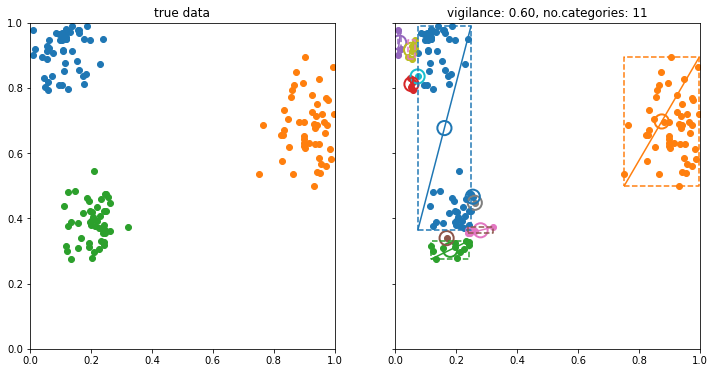

In [3]:
now = timestamp()[0]
np.random.shuffle(alldata)

no_epoch = 3
fig, axs = plt.subplots(1, 2,
                        figsize = (12, 6), sharex=True, sharey=True)
#fig.tight_layout()

# plot true data
pca_painter.scatter(axs[0], label_true)
axs[0].set_title("true data")
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

# init
rho=0.6
net = FuzzyART(alpha=1, gamma=.00001, rho=rho, best_match_num=3)
    
ax = axs[1]
for data in alldata.reshape(-1, 1, 2):
    ax.cla()
    new_sample = [a.scatter(*data[0], color='k', marker='x', s=666) for a in axs]
    # train
    net.train(data) # each epoch, all data is shuffled
    label_predall = net.test(alldata)
    label_pred = label_predall[:, 0].astype(int)

    # plot
    # pred
    pca_painter.scatter(ax, label_pred, alldata)
    
    # bipole and centre
    pca_painter.tripole(ax, *net.getcat_bipole())
    
    # boundary    
    ax.set_prop_cycle(None)
    pca_painter.boundary(ax, net.getcat_vertex())
    
    # info
    cat_number = net.w.shape[0]
    ax.set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))
    
   
    # save fig
    simname = 'var_rho{:d}'.format(int(rho*100))
    dirname = '_simcache/frames_{}'.format(now)
    savefigure_datetime(fig, simname, dirname)
    
    [ns.remove() for ns in new_sample]

